In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
comments=pd.read_csv('UScomments.csv',error_bad_lines=False)
comments

C:\Users\User\AppData\Local\Temp\ipykernel_11632\967890118.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv('UScomments.csv',error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\User\AppData\Local\Temp\ipykernel_11632\967890118.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv('UScomments.csv',error_bad_lines=False)


video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691395       0  
691396       0  
691397       0  
691398       0  
691399       0  

[691400 rows x 4 columns]

## Checking for missing values

In [3]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [4]:
#we can drop the missing values because our dataset is very large so we can drop some of the values 
comments.dropna(inplace=True)

In [5]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

##  Performing sentimental analysis

In [6]:
#Polarity lies between [-1,1] -1 : denotes negative sentiment , +1: denotes positive sentiment  , 0 : denotes neutral sentiment
#let's use textblob for sentimental analysis

In [7]:
pip install textblob

In [8]:
from textblob import TextBlob

In [9]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [10]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [11]:
#lets extract the polarity for all comments
polarity=[]
for comment in comments['comment_text']:
    #we might get an error if the comment_text is blank so we need to handle the exception using try exception
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
comments['polarity']=polarity
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

## Wordcloud Analysis

In [13]:
positive_sentiments=comments[comments['polarity']==1]
positive_sentiments

video_id                                       comment_text likes  \
64      XpVt6Z1Gjjo                                    yu are the best     1   
156     cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227     WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307     sjlHnJvXdQs                                  This is priceless     0   
319     sjlHnJvXdQs                                Summed up perfectly     0   
...             ...                                                ...   ...   
691373  EoejGgUNmVU                             Perfect. Every version     0   
691383  EoejGgUNmVU                                  Me encantaaaaa <3     0   
691388  EoejGgUNmVU                                   Best song ever 🤘     0   
691389  EoejGgUNmVU                              excellent performance     0   
691393  EoejGgUNmVU                                                 <3     0   

       replies  polarity  
64           0       1.0  
156          0       1.0  
227          0       1.0  
307          0       1.0  
319          0       1.0  
...        ...       ...  
691373       0       1.0  
691383       0       1.0  
691388       0       1.0  
691389       0       1.0  
691393       0       1.0  

[19390 rows x 5 columns]

In [14]:
negative_sentiments=comments[comments['polarity']==-1]
negative_sentiments

video_id                                       comment_text likes  \
512     8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562     8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952     Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371    vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391    vu_9muoxT50                    cheeseus christ thats insane!!!     0   
...             ...                                                ...   ...   
690788  Hlt3rA-oDao                                Like Kelly she evil     0   
690865  Ni5Uc-DdMqk                     R U FUCKING KIDDING ME?!?!?!?!    11   
691073  4kmSATD25iY           This is horribly offensive please report     0   
691180  xlu6i6lT_vk  Sink holes looks terrifying sinkholes sink you...     0   
691224  qRoVlH1OcI4  Trump talked to the president of US Virgin Isl...     0   

       replies  polarity  
512          0      -1.0  
562          0      -1.0  
952          0      -1.0  
1371         0      -1.0  
1391         0      -1.0  
...        ...       ...  
690788       0      -1.0  
690865       1      -1.0  
691073       0      -1.0  
691180       0      -1.0  
691224       0      -1.0  

[3508 rows x 5 columns]

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
type(comments['comment_text'])

pandas.core.series.Series

In [18]:
#in Wordcloud we have to pass the data as a string and not as a Series but our comment_text is a series so we need to convert it to string by using the join function to convert the comment_text into string
total_positive_comments=' '.join(positive_sentiments['comment_text'])

In [19]:
#lets generate the wordcloud
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)

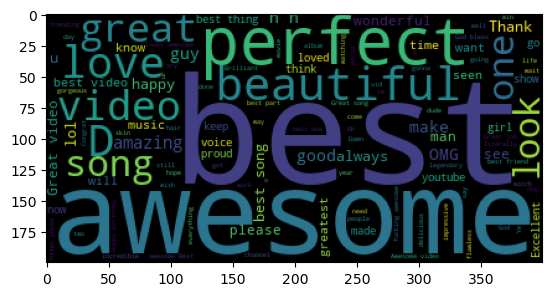

In [20]:
#The imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
plt.imshow(wordcloud)

In [21]:
#for negative comments
total_negative_comments=' '.join(negative_sentiments['comment_text'])

In [22]:
wordcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)

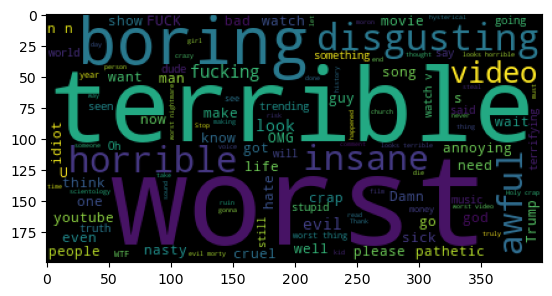

In [23]:
plt.imshow(wordcloud2)

## Emoji Analysis

In [24]:
pip install emoji==2.2.0

Note: you may need to restart the kernel to use updated packages.


In [25]:
import emoji

In [26]:
emoji.__version__

'2.2.0'

In [27]:
emoji_list=[]
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [28]:
emoji_list

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤',
 '😂',
 '❤',
 '💎',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😆',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😒',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '👏',
 '😊',
 '❤',
 '👈',
 '😂',
 '😂',
 '👌',
 '👌',
 '🤔',
 '👈',
 '😂',
 '😂',
 '😁',
 '💔',
 '😂',
 '👎',
 '👎',
 '👎',
 '👎',
 '👎',
 '🍎',
 '😤',
 '😂',
 '😂',
 '😂',
 '😂',
 '👈',
 '😭',
 '😭',
 '😭',
 '😢',
 '😢',
 '😢',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '💋',
 '💋',
 '👫',
 '💘',
 '😻',
 '💋',
 '💋',
 '💖',
 '💖',
 '💖',
 '💖'

In [29]:
from collections import Counter

In [30]:
Counter(emoji_list)

Counter({'‼': 211,
         '😉': 998,
         '😭': 8398,
         '👍': 5476,
         '🏻': 3438,
         '❤': 31119,
         '😍': 33453,
         '💋': 968,
         '💙': 2831,
         '👈': 126,
         '😂': 36987,
         '🔥': 8694,
         '👻': 268,
         '💎': 316,
         '😆': 1149,
         '😁': 2220,
         '😒': 629,
         '👏': 5719,
         '😊': 3596,
         '👌': 3112,
         '🤔': 1592,
         '💔': 617,
         '👎': 673,
         '🍎': 49,
         '😤': 378,
         '😢': 2672,
         '👫': 33,
         '💘': 702,
         '😻': 1409,
         '💖': 5359,
         '🌟': 549,
         '😮': 1232,
         '👇': 151,
         '😳': 398,
         '😠': 599,
         '😴': 187,
         '😝': 413,
         '™': 46,
         '☺': 1180,
         '😔': 545,
         '😩': 1472,
         '😡': 478,
         '🙏': 1818,
         '😄': 1496,
         '😬': 3381,
         '☹': 173,
         '🤷': 334,
         '🤣': 2279,
         '😃': 1235,
         '🏽': 1593,
         '🍏': 56,
      

In [31]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [32]:
emojis=[]
for i in range(10):
    emojis.append(Counter(emoji_list).most_common(10)[i][0])

In [33]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [34]:
count=[]
for i in range(10):
    count.append(Counter(emoji_list).most_common(10)[i][1])

In [35]:
count

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

<BarContainer object of 10 artists>

C:\Users\User\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIR

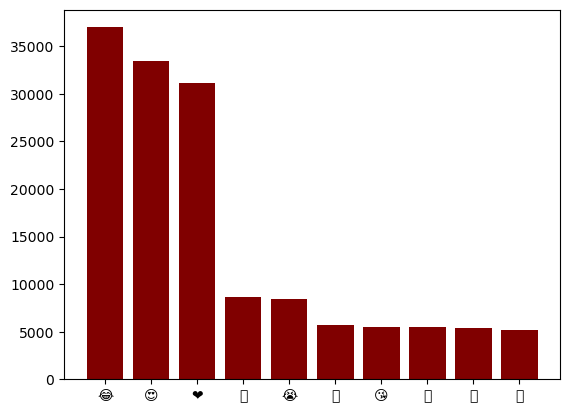

In [36]:
plt.bar(emojis,count,color="maroon")

## Now let's get the entire data of Youtube

In [37]:
import os

In [38]:
files=os.listdir(r"C:\Users\User\Documents\Youtube_Analysis\additional_data")

In [39]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [40]:
file_csv=[]
for file in files:
    if ".csv" in file:
        file_csv.append(file)

In [41]:
file_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [42]:
print(os.getcwd())

C:\Users\User\Documents\Youtube_Analysis


In [43]:
import warnings

In [44]:
from warnings import filterwarnings
filterwarnings("ignore")

## Let's create a dataframe of all the csv files

In [45]:
df=pd.DataFrame()
path=r'C:\Users\User\Documents\Youtube_Analysis\additional_data'
for file in file_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='ISO-8859-1',error_bad_lines=False)
    
    df=pd.concat([df,current_df])

In [46]:
df

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
0                    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                      nigahiga           24  2017-11-12T18:01:41.000Z   
4                    Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609    38160   
40945                                             [none]   1064798    60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
4

## Let's clean the data

In [47]:
df[df.duplicated()]

video_id trending_date  \
38     oWQuB2lVQLc      17.14.11   
54     JzCsM1vtn78      17.14.11   
58     U3xLOo-CNwo      17.14.11   
108    YYOCmR5Lvbw      17.14.11   
110    d380meD0W0M      17.14.11   
...            ...           ...   
40912  UKserM-i0_A      18.14.06   
40929  hHaUQh6Gx-Q      18.14.06   
40934  Qcj15vHJTtk      18.14.06   
40939  pcJo0tIWybY      18.14.06   
40944  BZt0qjTWNhw      18.14.06   

                                                   title        channel_title  \
38     Zvezde Granda - Cela emisija 06 - ZG 2017/18 -...        Zvezde Granda   
54                  THE LOGANG MADE HISTORY. LOL. AGAIN.     Logan Paul Vlogs   
58     12 Weird Ways To Sneak Food Into Class / Back ...          Troom Troom   
108              2017 Brazil Grand Prix: Race Highlights            FORMULA 1   
110                             I Dare You: GOING BALD!?             nigahiga   
...                                                  ...                  ...   
40912            Panic! At The Disco: High Hopes (Audio)  Panic! At The Disco   
40929                     Mustard, Nick Jonas - Anywhere          MustardVEVO   
40934                                Royal Wedding - SNL  Saturday Night Live   
40939    SZA - Garden (Say It Like Dat) (Official Video)              SZAVEVO   
40944                       The Cat Who Caught the Laser        AaronsAnimals   

       category_id              publish_time  \
38              24  2017-11-12T00:02:41.000Z   
54              24  2017-11-12T20:19:24.000Z   
58              26  2017-11-12T15:00:05.000Z   
108             17  2017-11-12T22:05:07.000Z   
110             24  2017-11-12T18:01:41.000Z   
...            ...                       ...   
40912           10  2018-05-23T18:00:13.000Z   
40929           10  2018-05-22T12:00:02.000Z   
40934           24  2018-05-20T04:58:51.000Z   
40939           10  2018-05-18T14:00:04.000Z   
40944           15  2018-05-18T13:00:04.000Z   

                                                    tags    views   likes  \
38     zvezde|"granda"|"hit"|"emisija"|"grand"|"2016"...   496192    1503   
54     logan paul vlog|"logan paul"|"logan"|"paul"|"o...  4477587  292837   
58     sneak food|"how to sneak food into class"|"cla...  3153224   28451   
108    F1|"Formula One"|"Formula 1"|"Sports"|"Sport"|...   758492   11936   
110    ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095828  132239   
...                                                  ...      ...     ...   
40912  Panic At The Disco|"Panic! At The Disco"|"PATD...  7676068  230427   
40929  Mustard|"Nick"|"Jonas"|"Anywhere"|"10"|"Summer...  2653229   48889   
40934  SNL|"Saturday Night Live"|"SNL Season 43"|"SNL...  8607264   66559   
40939  Garden (Say It Like Dat)|"R&B"|"SZA"|"Top Dawg...  6004782  210802   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...  1685609   38160   

       dislikes  comment_count  \
38          443           1020   
54         4123          36391   
58         2285           3312   
108         160           1472   
110        1989          17518   
...         ...            ...   
40912      3383          22924   
40929       890           1181   
40934     14179           8382   
40939      4166          15169   
40944      1385           2657   

                                       thumbnail_link  comments_disabled  \
38     https://i.ytimg.com/vi/oWQuB2lVQLc/default.jpg              False   
54     https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg              False   
58     https://i.ytimg.com/vi/U3xLOo-CNwo/default.jpg              False   
108    https://i.ytimg.com/vi/YYOCmR5Lvbw/default.jpg              False   
110    https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40912  https://i.ytimg.com/vi/UKserM-i0_A/default.jpg              False   
40929  https://i.ytimg.com/vi/hHaUQh6Gx-Q/default.jpg              False   
40934  ht

In [48]:
#there are 36417 duplicate rows

In [49]:
df=df.drop_duplicates()

## Analyzing the most liked category

In [50]:
json_df=pd.read_json(r"C:\Users\User\Documents\Youtube_Analysis\additional_data/US_category_id.json")

In [51]:
json_df

kind  \
0   youtube#videoCategoryListResponse   
1   youtube#videoCategoryListResponse   
2   youtube#videoCategoryListResponse   
3   youtube#videoCategoryListResponse   
4   youtube#videoCategoryListResponse   
5   youtube#videoCategoryListResponse   
6   youtube#videoCategoryListResponse   
7   youtube#videoCategoryListResponse   
8   youtube#videoCategoryListResponse   
9   youtube#videoCategoryListResponse   
10  youtube#videoCategoryListResponse   
11  youtube#videoCategoryListResponse   
12  youtube#videoCategoryListResponse   
13  youtube#videoCategoryListResponse   
14  youtube#videoCategoryListResponse   
15  youtube#videoCategoryListResponse   
16  youtube#videoCategoryListResponse   
17  youtube#videoCategoryListResponse   
18  youtube#videoCategoryListResponse   
19  youtube#videoCategoryListResponse   
20  youtube#videoCategoryListResponse   
21  youtube#videoCategoryListResponse   
22  youtube#videoCategoryListResponse   
23  youtube#videoCategoryListResponse   
24  youtube#videoCategoryListResponse   
25  youtube#videoCategoryListResponse   
26  youtube#videoCategoryListResponse   
27  youtube#videoCategoryListResponse   
28  youtube#videoCategoryListResponse   
29  youtube#videoCategoryListResponse   
30  youtube#videoCategoryListResponse   
31  youtube#videoCategoryListResponse   

                                                 etag  \
0   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
5   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
6   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
7   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
8   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
9   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
10  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
11  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
12  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
13  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
14  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
15  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
16  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
17  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
18  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
19  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
20  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
21  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
22  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
23  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
24  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
25  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
26  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
27  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
28  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
29  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
30  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
31  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                                items  
0   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
5   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
6   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
7   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
8   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
9   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
10  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
11  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
12  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
13  {'kind': 

In [52]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [53]:
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [54]:
category_dict={}
#we want our output in the form of 'id':'title'
for item in json_df['items']:
    category_dict[int(item['id'])]=item['snippet']['title']

In [55]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [56]:
df['category_title']=df['category_id'].map(category_dict)

In [57]:
df

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40943  1PhPYr_9zRY      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
40943  BTS Plays With Puppies While Answering Fan Que...   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
0                    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                      nigahiga           24  2017-11-12T18:01:41.000Z   
4                    Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                         ...          ...                       ...   
40943            BuzzFeed Celeb           22  2018-05-18T16:39:29.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40943  BuzzFeed|"BuzzFeedVideo"|"Puppy Interview"|"pu...   8259128   645888   
40945                                             [none]   1064798    60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40943      4052          62610   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40943  https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg              False   
4

In [58]:
most_liked=df.groupby(['category_title']).sum().sort_values('likes',ascending=False)
top_5=most_liked.head()
top_5

category_id         views       likes   dislikes  \
category_title                                                       
Music                  369900  220389615568  5867826278  243017727   
Entertainment         2336760   85162066718  2377832055  222057985   
Comedy                 552552   18341009925   931444449   34991282   
People & Blogs        1103608   19178440262   583368312   49847819   
Film & Animation        18329   20397383805   437611281   18923289   

                  comment_count  comments_disabled  ratings_disabled  \
category_title                                                         
Music                 484293893                202               183   
Entertainment         349450726               2194              1622   
Comedy                 93553601                152               225   
People & Blogs         85891234                998              1277   
Film & Animation       48903677                455               450   

                  video_error_or_removed  
category_title                            
Music                                 56  
Entertainment                         67  
Comedy                                 3  
People & Blogs                         7  
Film & Animation                      80

In [59]:
import seaborn as sns

Text(0, 0.5, 'Category')

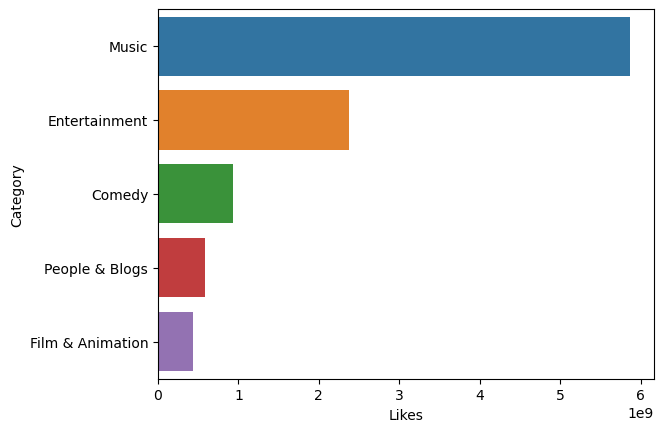

In [60]:
sns.barplot(top_5,y=top_5.index,x=top_5["likes"])
plt.xlabel("Likes")
plt.ylabel("Category")

## Let's see whether Audience is engaged or not

In [61]:
# this depends on like rate, dislike rate , comment rate it clearly tells how much the audience is engaged.
#lets build those measures
df['likes rate']=(df['likes']/df['views'])*100
df['dislikes rate']=(df['dislikes']/df['views'])*100
df['comment count rate']=(df['comment_count']/df['views'])*100

In [62]:
df

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40943  1PhPYr_9zRY      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
40943  BTS Plays With Puppies While Answering Fan Que...   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
0                    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                      nigahiga           24  2017-11-12T18:01:41.000Z   
4                    Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                         ...          ...                       ...   
40943            BuzzFeed Celeb           22  2018-05-18T16:39:29.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40943  BuzzFeed|"BuzzFeedVideo"|"Puppy Interview"|"pu...   8259128   645888   
40945                                             [none]   1064798    60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40943      4052          62610   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40943  https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg              False   
4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

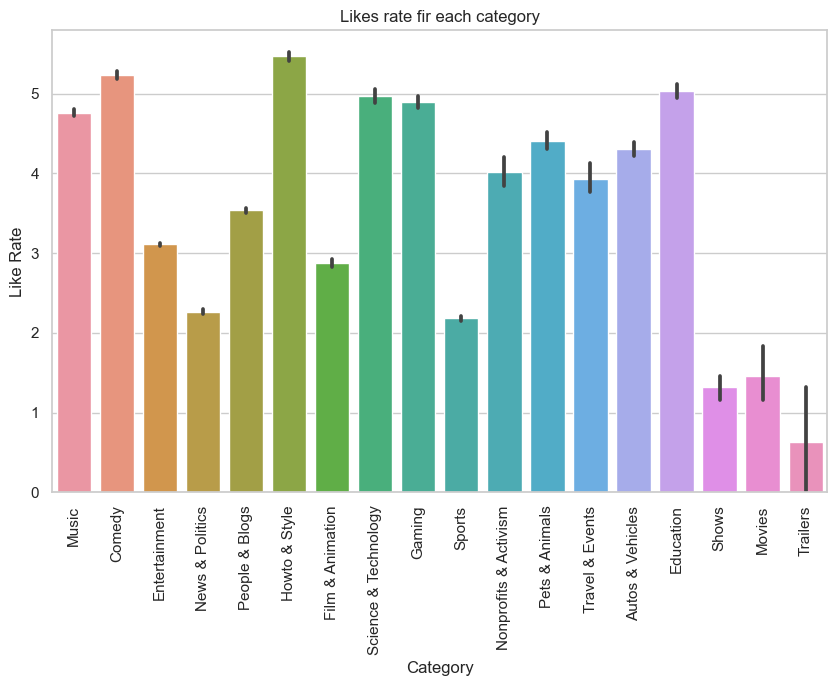

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='category_title', y='likes rate', data=df)
plt.xlabel('Category')
plt.ylabel('Like Rate')
plt.title('Likes rate fir each category')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

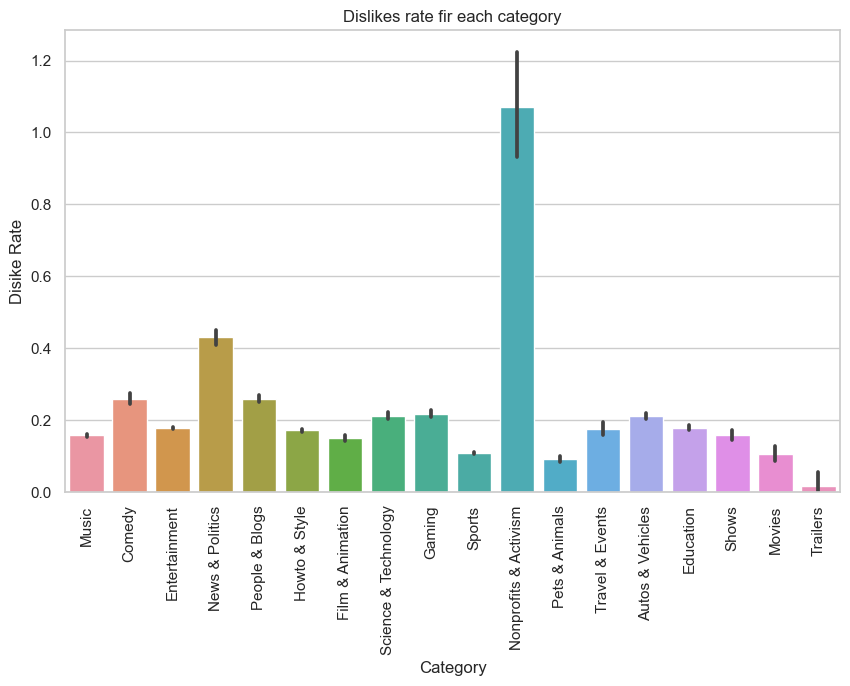

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='category_title', y='dislikes rate', data=df)
plt.xlabel('Category')
plt.ylabel('Disike Rate')
plt.title('Dislikes rate fir each category')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

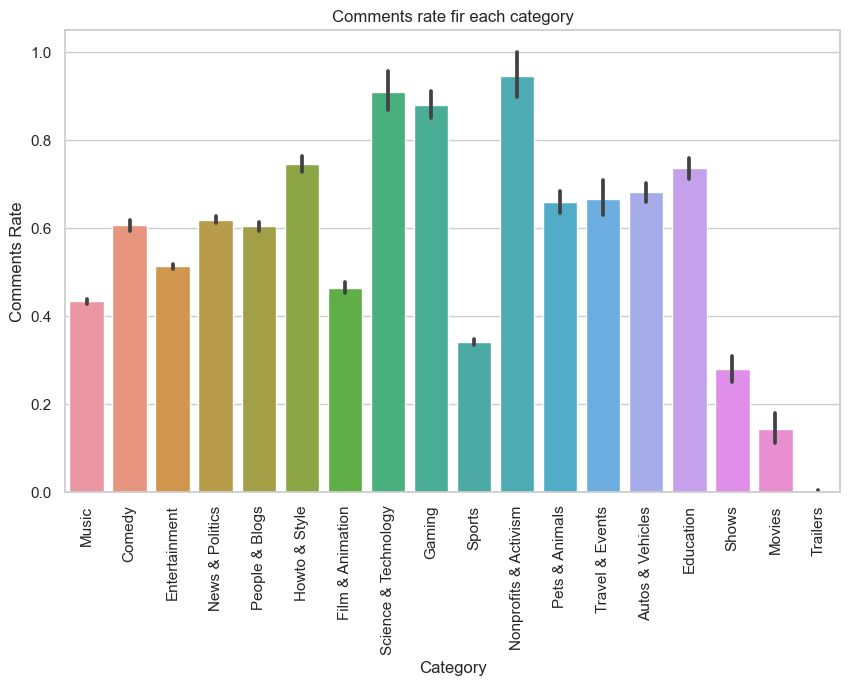

In [65]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='category_title', y='comment count rate', data=df)
plt.xlabel('Category')
plt.ylabel('Comments Rate')
plt.title('Comments rate fir each category')
plt.xticks(rotation=90)

<Axes: xlabel='views', ylabel='comment_count'>

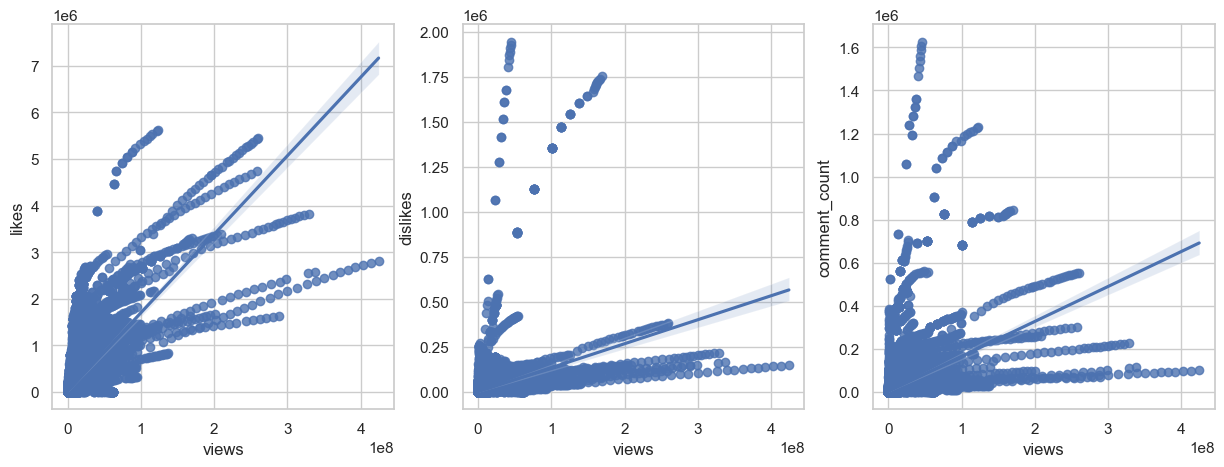

In [66]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(x='views',y='likes' , data=df,ax=axes[0])
sns.regplot(x='views',y='dislikes' , data=df,ax=axes[1])
sns.regplot(x='views',y='comment_count' , data=df,ax=axes[2])

In [67]:
#lets find the correlation between views,likes and dislikes
df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.779531  0.405428
likes     0.779531  1.000000  0.451809
dislikes  0.405428  0.451809  1.000000

<Axes: >

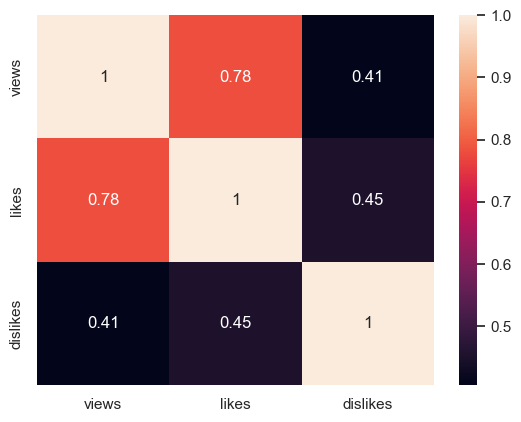

In [68]:
sns.heatmap(df[['views','likes','dislikes']].corr(),annot=True)

## Which channel has the largest number of trending videos

In [69]:
df_trending=df['channel_title'].value_counts().head(20).to_frame().reset_index()
df_trending
df_trending=df_trending.rename(columns={'index':'channel title','channel_title':'count'})
df_trending

channel title  count
0       The Late Show with Stephen Colbert    710
1                                      WWE    643
2              Late Night with Seth Meyers    592
3                             TheEllenShow    555
4                        Jimmy Kimmel Live    528
5                                PewDiePie    511
6   The Tonight Show Starring Jimmy Fallon    509
7                                      CNN    500
8     The Late Late Show with James Corden    453
9                                     ESPN    452
10                                     FBE    439
11                               VikatanTV    435
12                                 Netflix    410
13                               SET India    405
14                          MLG Highlights    382
15                           BuzzFeedVideo    361
16                                  SMTOWN    359
17                                  Ãukur    356
18                    Marvel Entertainment    352
19                                  SAB TV    351

In [70]:
import plotly.express as px

In [71]:
px.bar(data_frame=df_trending,x='channel title',y='count')